## Opgave 2  
**poging 1**

In [20]:
import pandas as pd   #inladen bibliotheken           
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                  
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
import statsmodels.stats.api as sms    
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.regression as sr
import statsmodels as st 
from scipy import stats  

In [21]:
## Dataset inladen
studenten=pd.read_csv('studenten.csv')
studenten 

,studie,gemiddelde_cijfer,cijfer_studiehouding,uren_zelfstudie,uren_activiteiten,reisafstand,woonsituatie,eigen_studieruimte,situatie_ouders,niveau_VO,cijfer_NL,cijfer_EN,cijfer_WIS,type_WIS
0,Accountancy,6.86,7,12,11,8.4,uitwonend,ja,samenwonend,vmbo,5,8,8,NaN
1,Finance & Control,8.70,9,20,11,21.6,thuiswonend,ja,samenwonend,vmbo,6,6,6,NaN
2,Accountancy,10.00,10,19,16,16.1,thuiswonend,ja,gescheiden,havo,8,6,5,A
3,Accountancy,7.88,8,13,9,15.0,thuiswonend,ja,samenwonend,vmbo,5,7,8,NaN
4,Accountancy,6.13,7,13,14,12.8,thuiswonend,nee,samenwonend,vmbo,7,6,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,Accountancy,6.64,5,13,13,10.9,thuiswonend,ja,samenwonend,havo,5,7,6,A
313,Accountancy,8.51,8,16,8,13.1,thuiswonend,ja,samenwonend,havo,7,7,5,A
314,Finance & Control,5.73,5,12,12,12.7,thuiswonend,ja,samenwonend,vmbo,6,6,5,NaN
315,Accountancy,6.88,8,6,16,14.2,thuiswonend,ja,samenwonend,vmbo,7,5,6,NaN


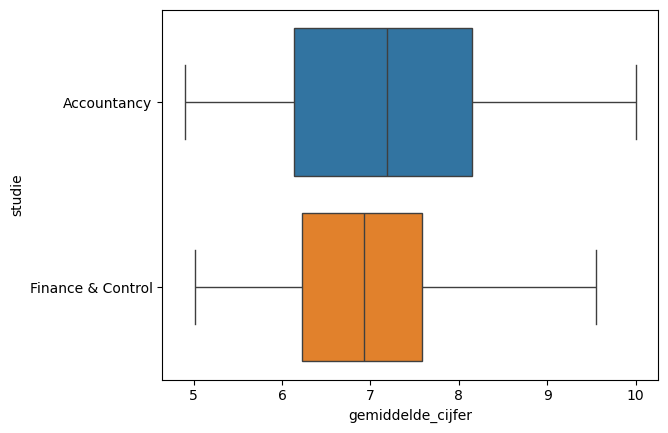

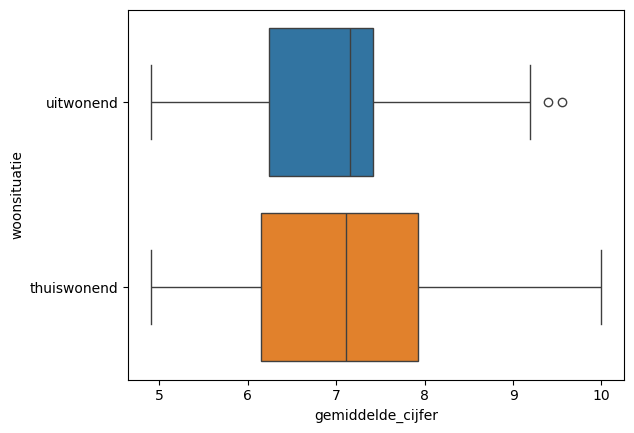

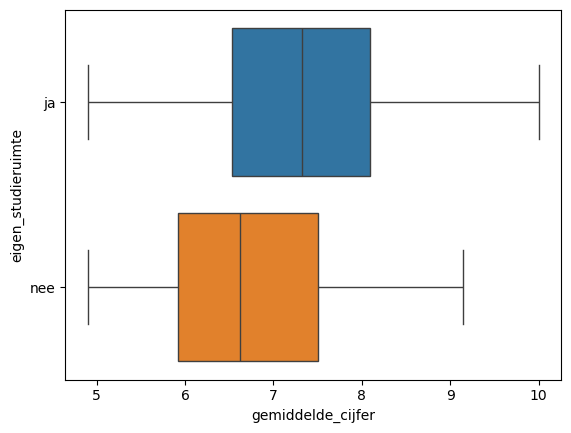

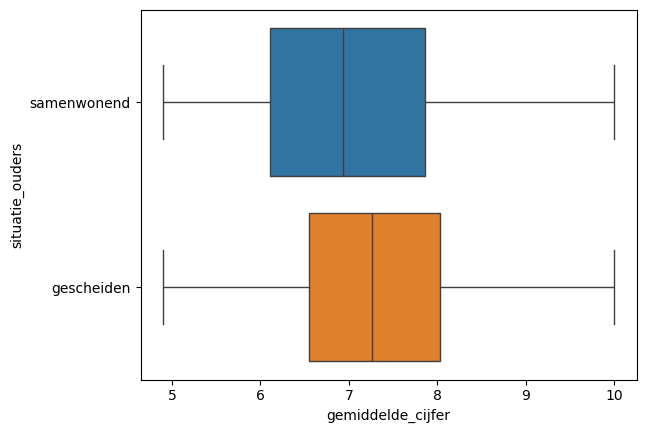

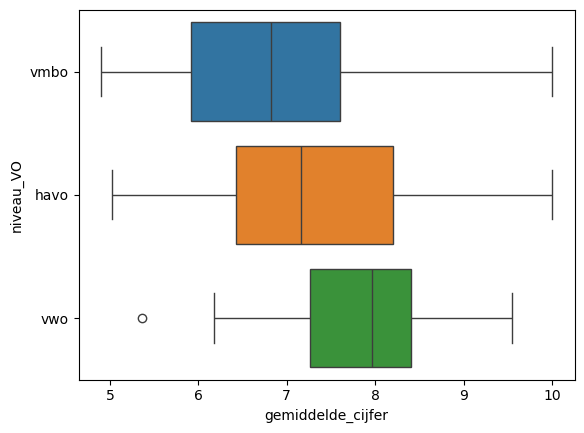

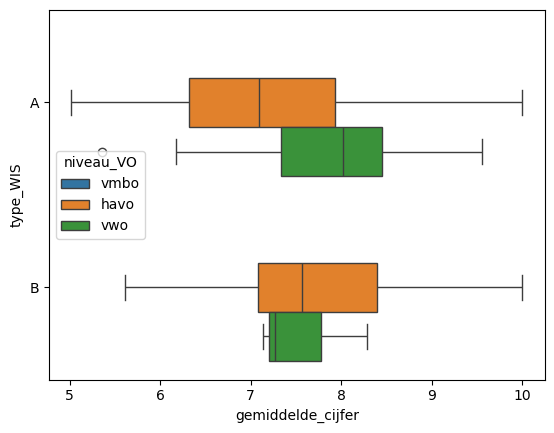

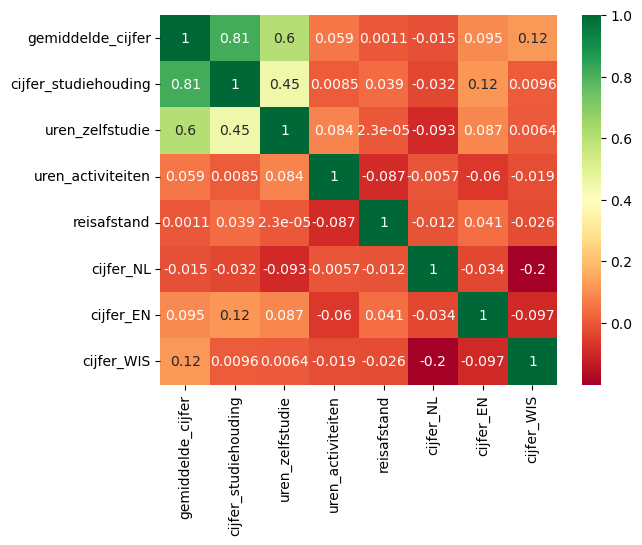

In [22]:
# We hebben boxplots geplot om de verdeling van variabelen per categorie te bekijken.
sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['studie'], hue=studenten['studie'], orient="h")
plt.show() 

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['woonsituatie'], hue=studenten['woonsituatie'], orient="h")
plt.show()

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['eigen_studieruimte'], hue=studenten['eigen_studieruimte'], orient="h")
plt.show()

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['situatie_ouders'], hue=studenten['situatie_ouders'], orient="h")
plt.show()  

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['niveau_VO'], hue=studenten['niveau_VO'], orient="h")
plt.show()   
 
sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['type_WIS'], hue=studenten['niveau_VO'], orient="h")
plt.show() 


# Daarnaast hebben we ook een heatmap  geplot om de correlaties tussen de numerieke variabelen te bekijken.
numerieke_kol = studenten.select_dtypes(include=['float64', 'int64']).columns
numerieke_corre = studenten[numerieke_kol].corr()
heat = sns.heatmap(numerieke_corre, cmap="RdYlGn", annot=True)
plt.show()


Uit deze analyses komen naar voren dat de categorische variabelen: studiekeuze, eigen studieruimte, situatie_ouders en niveau_VO een sterk invloed hebben op de gemiddelde cijfer. Verder komt uit de analyses naar voren dat de nummerieke variabelen: uren_zelfstudie en cijfer_studiehouding impact hebben op de gemiddelde cijfer. 

<Axes: xlabel='uren_zelfstudie', ylabel='gemiddelde_cijfer'>

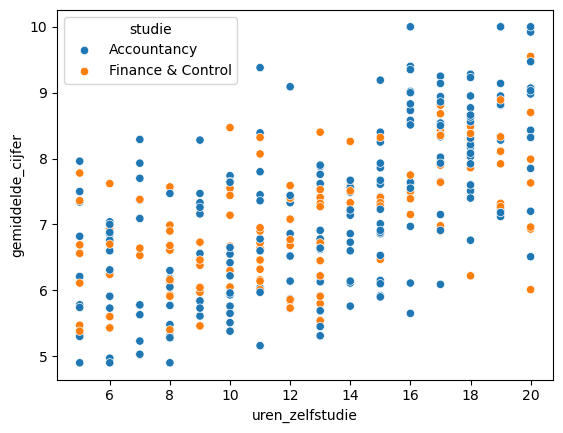

In [23]:
sns.scatterplot(y=studenten.gemiddelde_cijfer, x=studenten.uren_zelfstudie, hue=studenten['studie'])  
#Om het verband van de nummerieke variabelen met de gemiddelde cijfer verder te analyseren maken we scatterplots. 

<Axes: xlabel='cijfer_studiehouding', ylabel='gemiddelde_cijfer'>

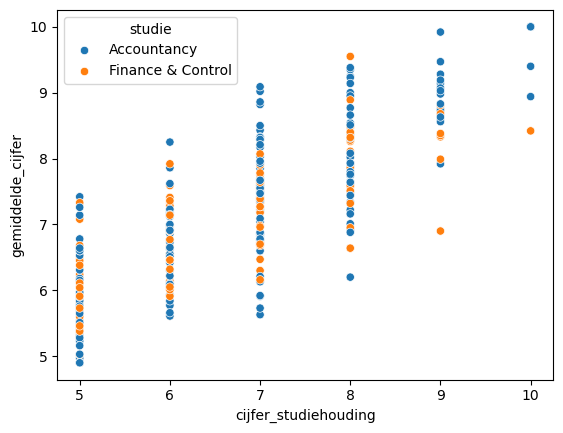

In [24]:
sns.scatterplot(y=studenten.gemiddelde_cijfer, x=studenten.cijfer_studiehouding, hue=studenten['studie']) 
#Om het verband van de nummerieke variabelen met de gemiddelde cijfer verder te analyseren maken we scatterplots. 

Uit de plots, die zijn gemaakt, blijkt er een lineair verband te zijn tussen het gemiddelde cijfer en de niveau voorgezet niveau en het gemiddelde cijfer en cijfer studiehouding. Dit gaan we verder testen met een lineair regressiemodel. 

In [25]:
#Dummy variabelen aanmaken van de categorische variabelen
studenten['niveau_VO'] = studenten.niveau_VO.map({'vmbo':0,'havo': 1,'vwo':2}) 
studenten['woonsituatie'] = studenten.woonsituatie.map({'uitwonend':0,'thuiswonend': 1}) 
studenten['situatie_ouders'] = studenten.situatie_ouders.map({'samenwonend':0,'gescheiden': 1}) 
studenten['eigen_studieruimte'] = studenten.eigen_studieruimte.map({'ja':0,'nee': 1})  
studenten['type_WIS'] = studenten['type_WIS'].fillna("geen") 
studenten['type_WIS'] = studenten.type_WIS.map({'geen':0,'A': 1,'B':2})   
studenten['studie'] = studenten.studie.map({'Accountancy':0,'Finance & Control': 1}) 


studenten['niveau_VO']
studenten['woonsituatie']
studenten['situatie_ouders']
studenten['eigen_studieruimte']
studenten['type_WIS'] 
studenten['studie']

0      0
1      1
2      0
3      0
4      0
      ..
312    0
313    0
314    1
315    0
316    1
Name: studie, Length: 317, dtype: int64

In [26]:
# We gaan schattingen doen

# We stellen een model op met OLS. 
model = smf.ols('gemiddelde_cijfer ~ uren_zelfstudie + cijfer_studiehouding + eigen_studieruimte + niveau_VO + type_WIS + studie + situatie_ouders', data=studenten)

# Hierbij schatten we het model
regres = model.fit()

# We printen de samenvatting van de regressieresultaten. 
print(regres.summary())

                            OLS Regression Results                            
Dep. Variable:      gemiddelde_cijfer   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     397.8
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.89e-150
Time:                        21:07:46   Log-Likelihood:                -128.70
No. Observations:                 317   AIC:                             273.4
Df Residuals:                     309   BIC:                             303.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.9334 

Hieronder gaan we door middel van verschillende testen toetsen of ons model statisch valide is. 

Hierbij wordt er gekeken naar de volgende voorwaarden: 
- normaliteit 
- centraliteit 
- homoscedasticiteit 
- multicollineariteit 

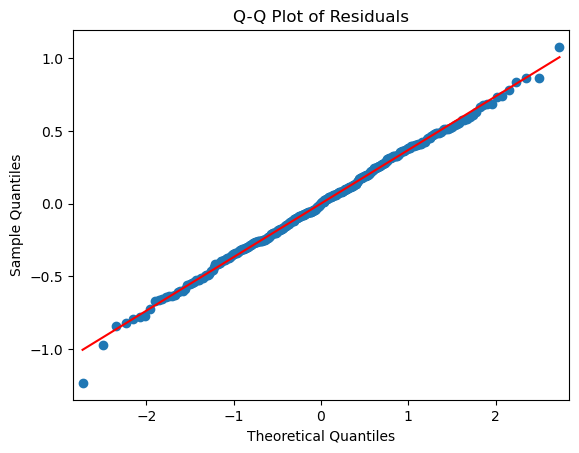

Shapiro-Wilk statistic 0.9983, p-value: 0.9895
t-test statistic for central tendency 0.0000 p-value: 1.0000


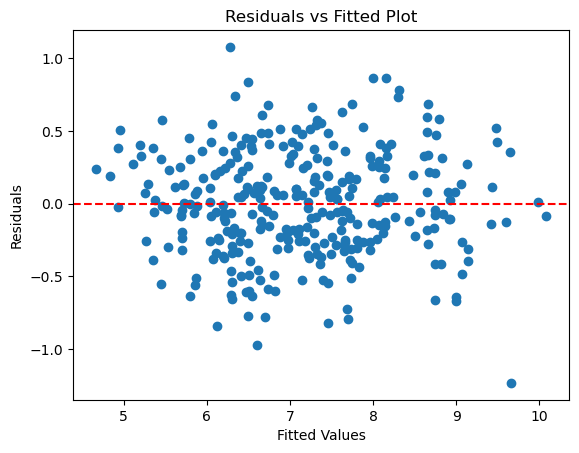

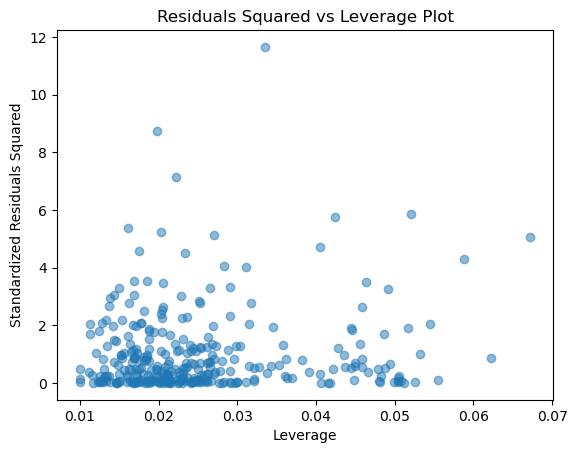

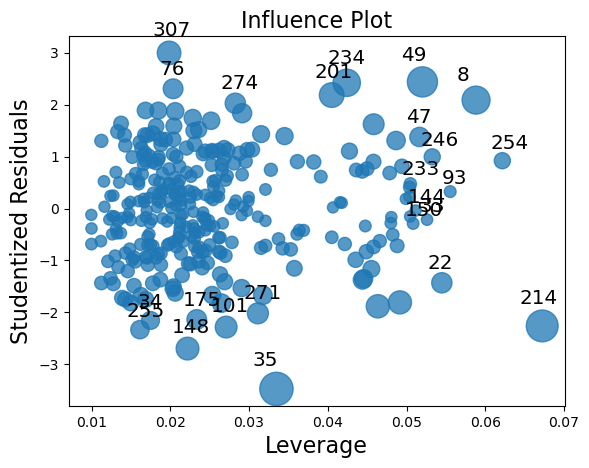

Breusch-Pagan statistic: 5.0063, p-value=0.6592
VIF values:
cijfer_studiehouding : 15.05450852262058
uren_zelfstudie : 11.271260482839361
eigen_studieruimte : 1.4554841297388041
niveau_VO : 6.714194720562682
type_WIS : 6.790270395268978
studie : 1.5384227915163409
situatie_ouders : 1.5134226968560542


In [27]:
# Q-Q plotten om de normaliteit te toetsen
sm.qqplot(regres.resid, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test om de normaliteit te toetsen
shapiro_test = stats.shapiro(regres.resid)
print("Shapiro-Wilk statistic {:.4f}, p-value: {:.4f}".format(shapiro_test.statistic, shapiro_test.pvalue))
    
# Toets om de centraliteit te toetsen 
t_test = stats.ttest_1samp(regres.resid, 0)
print("t-test statistic for central tendency {:.4f} p-value: {:.4f}".format(t_test.statistic, t_test.pvalue))

# Residuals vs Fitted plotten om de centraliteit te toetsen 
plt.scatter(regres.fittedvalues, regres.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Leverage vs Residuals squared plotten om de homoscedasticiteit te toetsen 
influence = regres.get_influence()
leverage = influence.hat_matrix_diag
resid_stud = influence.resid_studentized_internal

plt.scatter(leverage, resid_stud**2, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals Squared')
plt.title('Residuals Squared vs Leverage Plot')
plt.show()

sm.graphics.influence_plot(regres, size=24, criterion="cooks") 
plt.show()

# Breusch Pagan toets om de homoscedasticiteit te toetsen
brpg = sms.het_breuschpagan(regres.resid, model.exog)
print('Breusch-Pagan statistic: {:.4f}, p-value={:.4f}'.format(brpg[0],brpg[1]))

# Check om multicollineariteit te toetsen
X = studenten[['cijfer_studiehouding', 'uren_zelfstudie', 'eigen_studieruimte', 'niveau_VO', 'type_WIS', 'studie', 'situatie_ouders']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF values:")
for i, col in enumerate(X.columns): 
    print(col, ":", vif[i])

conclusie: Op basis van de spreiding van de Residuals vs Fitted plot en Residuals vs Leverage plot nemen de homoscedasticiteit in twijfel. Daarnaast geldt ook dat de VIF waarde te groot is, dus op basis van de voorwaarden om te controleren of ons lineair regressiemodel statistisch valide is, nemen wij dit model niet.